# Handwritten Digit Recognition

This is a model for recognizing a handwritten digit from 0 to 9


## Importing Packages

Imports the below listed libraries

- Numpy 
- Matplotlib
- TensorFlow
- Scikit learn

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Loads the handwritten data 

Loads the handwritten data from http://yann.lecun.com/exdb/mnist/

This is the MNIST handwritten digit dataset (http://yann.lecun.com/exdb/mnist/)

In [4]:
# Loads the training data
X = np.load('../Binary_Handwritten_Recognition/Data/X.npy')
print(f'The shape of the training dta is {X.shape}')

# Loads the target values
y = np.load('../Binary_Handwritten_Recognition/Data/y.npy')
print(f'The shape of the target values is {y.shape}')

The shape of the training dta is (5000, 400)
The shape of the target values is (5000, 1)


## Visualizing the data

This outputs few of the training examples and the target values

In [5]:
print(f'The first few training examples are \n {X[:5]}')

print(f'The first five target values are \n {y[:5]}')

The first few training examples are 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
The first five target values are 
 [[0]
 [0]
 [0]
 [0]
 [0]]


## Data splitting 

This ssplits the data into train, cross validation(cv) and test set.

The train set will be used to train the model

The cross validation set will be used to validate the parameters gained from the train set to minimize variance(overfitting) or bias(underfitting). 

The test set will be used to test the model chosen after cross validation. 

40% train set, 20% cross validation(cv) set and 20% test set.

In [6]:
#help(train_test_split)
#This splits the data into train set and X_ and y_ which will inturn be subdided into cross validation and test set
X_train, X_, y_train, y_ = train_test_split(X, y, train_size=0.6)
print(f'The shape  of the training data is {X_train.shape}')
print(f'The shape of the target values is {y_train.shape} \n')

X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.5)
print(f'The shape of the cross validation data is {X_cv.shape}')
print(f'The shape of the cross validation target values is {y_cv.shape} \n')

print(f'The shape of the test training data is {X_test.shape}')
print(f'The shape of the test set target value is {y_test.shape}')

The shape  of the training data is (3000, 400)
The shape of the target values is (3000, 1) 

The shape of the cross validation data is (1000, 400)
The shape of the cross validation target values is (1000, 1) 

The shape of the test training data is (1000, 400)
The shape of the test set target value is (1000, 1)


## Data Description

The training data has a shape of 5000 by 400 where 400 represents the features in a 20 by 20 pixels of a handwritten digit.

Outputting the 20 by 20 pixels of any of the training data shows the exact handwritten digit

The corresponding y value shows the exact handwritten digit for that specific training example

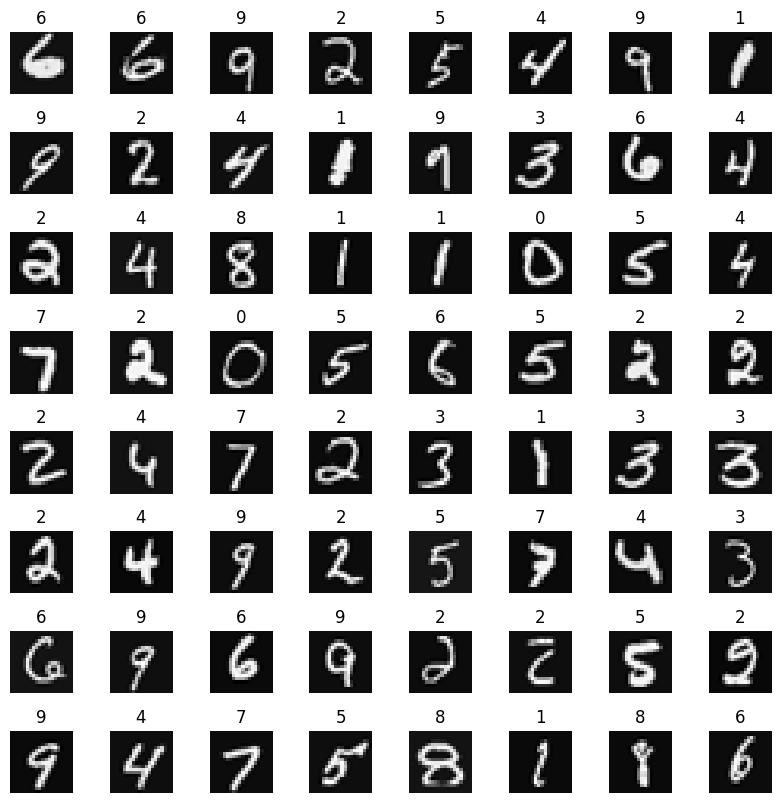

In [8]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X_train.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i, ax in enumerate(axes.flat):
    #Selects a random number within the training data range
    random_index = np.random.randint(m)

    #Selects row corresponding to the random index and 
    #Reshapes the image
    X_random_reshaped = X_train[random_index].reshape((20,20)).T

    #Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    #Dispalys the target value as a value above the image
    ax.set_title(y_train[random_index, 0])
    ax.set_axis_off()

